In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2

In [3]:
pwd

'/mnt/c/Users/sinad/Dropbox (Gladstone)/Feature_based_classification'

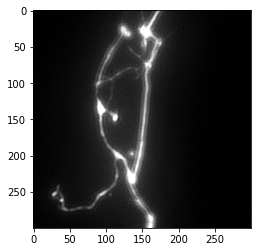

In [4]:
in_path = {'class1':'/mnt/c/Users/sinad/Dropbox (Gladstone)/Feature_based_classification/FIJI_SingleTp_S_CTR_1',
           'class2':'/mnt/c/Users/sinad/Dropbox (Gladstone)/Feature_based_classification/FIJI_SingleTp_N_CTR_1'}
class_list = ['class1', 'class2']

img_list_class1 = os.listdir(in_path['class1'])
img_list_class2 = os.listdir(in_path['class2'])

current_img_path = os.path.join(in_path['class2'], img_list_class2[0])
current_img = cv2.imread(current_img_path)
plt.imshow(current_img)

In [5]:
row, col,_ = current_img.shape
row, col

(300, 300)

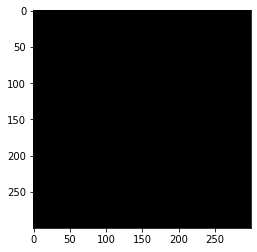

In [6]:
blank_img = np.zeros((row, col, 3), dtype=np.uint8)
plt.imshow(blank_img)

In [7]:
circle_mask = cv2.circle(blank_img, (150,150), 25, (1,1,1), -1)

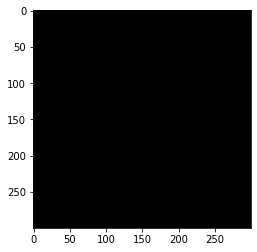

In [8]:
plt.imshow(circle_mask)

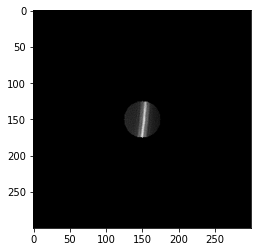

In [9]:
current_img_filtered = current_img*circle_mask
plt.imshow(current_img_filtered)

In [10]:
current_img_mean = np.round(np.mean(current_img.ravel()), 2)
current_img_mean

25.28

In [11]:
current_img_filtered_mean = np.round(np.mean(current_img_filtered), 2)
current_img_filtered_mean

1.37

In [12]:
def mean_circle_pix_intensity(input_path, img_list_class):
    img_mean_list = []
    blank_img = np.zeros((row, col, 3), dtype=np.uint8)
    circle_mask = cv2.circle(blank_img, (150,150), 25, (1,1,1), -1)
    
    for img in img_list_class:
        current_img_path = os.path.join(input_path, img)
        current_img = cv2.imread(current_img_path)
        current_img_filtered = current_img*circle_mask
        current_img_filtered_mean = np.round(np.mean(current_img_filtered), 2)
        img_mean_list.append(current_img_filtered_mean)
    return img_mean_list

img_mean_list_class_values = {}
for cl in class_list:
    assert os.path.exists(in_path[cl]), "Please confirm the input path is correct."
    img_list = os.listdir(in_path[cl])
#     print(img_list)
    img_mean_list_class_values[cl] = mean_circle_pix_intensity(in_path[cl], img_list)

print(img_mean_list_class_values)

{'class1': [3.8, 3.33, 3.8, 3.68, 3.66, 3.18, 3.0, 3.83, 3.25, 3.32, 3.94, 2.77, 3.1, 3.53, 3.44, 3.02, 3.34, 3.11, 2.64, 3.38, 3.02, 2.56, 3.02, 3.02, 3.37, 3.33, 3.91, 3.14, 2.69, 3.3, 2.89, 0.64, 2.9, 2.97, 2.05, 2.8, 2.89, 3.32, 2.07, 3.02, 3.32, 3.24, 2.97, 3.36, 2.99, 2.44, 2.7, 2.99, 2.93, 3.59, 2.87, 3.44, 3.7, 3.02, 3.69, 3.44, 3.5, 3.12, 3.15, 3.45, 2.8, 0.26, 0.83, 2.96, 2.71, 2.78, 2.77, 2.97, 2.84, 0.26, 3.31, 2.58, 2.49, 3.79, 3.15, 2.74, 2.87, 3.28, 1.93, 1.36, 2.0, 2.99, 1.29, 2.49, 2.82, 2.47, 3.36, 2.38, 2.85, 2.72, 3.83, 2.98, 3.81, 2.31, 2.46, 2.98, 3.63, 2.72, 2.25, 3.0, 3.32, 1.87, 0.22, 1.86, 2.95], 'class2': [1.37, 1.6, 1.91, 0.07, 1.2, 0.2, 1.61, 1.29, 1.56, 1.47, 0.36, 0.12, 1.52, 1.12, 0.38, 2.19, 0.98, 1.61, 0.97, 3.3, 1.04, 0.26, 2.5, 0.04, 1.63, 4.02, 1.96, 1.86, 1.39, 2.69, 1.77, 1.86, 1.44, 1.25, 1.55, 2.15, 1.02, 0.6, 2.29, 3.39, 1.67, 2.74, 0.88, 1.73, 0.92, 1.63, 0.19, 1.36, 1.61, 1.7, 1.38, 1.35, 1.43, 0.95, 2.82, 1.03, 1.19, 0.97, 1.16, 2.49, 2.36, 

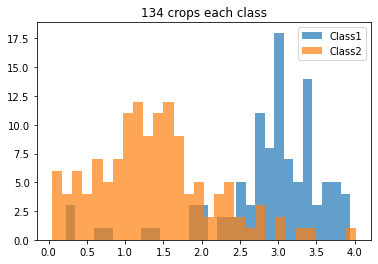

In [13]:
def histogram_plotter(img_mean_list_class1_values, img_mean_list_class2_values, title):
    """

    :param title:
    :param img_mean_list_class1_values: The mean pixel intensity per image of each crop in class 1.
    :param img_mean_list_class2_values: The mean pixel intensity per image of each crop in class 2.
    :return: Histogram plot showing the two classes.
    """
    plt.figure(title)
    plt.title("134 crops each class")
    # bins_class1 = np.linspace(math.ceil(min(img_mean_list_class1_values)),
    #                           math.floor(max(img_mean_list_class1_values)),
    #                           10)
    plt.hist(img_mean_list_class1_values, bins=30, range=(np.min(img_mean_list_class1_values),
                                                                   np.max(img_mean_list_class1_values)),
             label='Class1', alpha=0.7)
    # bins_class2 = np.linspace(math.ceil(min(img_mean_list_class2_values)),
    #                           math.floor(max(img_mean_list_class2_values)),
    #                           10)
    plt.hist(img_mean_list_class2_values, bins=30, range=(np.min(img_mean_list_class2_values),
                                                                   np.max(img_mean_list_class2_values)),
             label='Class2', alpha=0.7)
    plt.legend(loc='upper right')
    plt.show()

    return

histogram_plotter(img_mean_list_class_values[class_list[0]],
                  img_mean_list_class_values[class_list[1]], 'mean circle pix differences')

In [14]:
import pandas as pd
discriptive_class1 = pd.Series(img_mean_list_class_values[class_list[0]])
discriptive_class1
discriptive_class2 = pd.Series(img_mean_list_class_values[class_list[1]])                                    

In [15]:
print("Class 1 descriptive stats are: ", discriptive_class1.describe())
print("Class 2 descriptive stats are: ", discriptive_class2.describe())

Class 1 descriptive stats are:  count    105.000000
mean       2.877905
std        0.754189
min        0.220000
25%        2.710000
50%        2.990000
75%        3.330000
max        3.940000
dtype: float64
Class 2 descriptive stats are:  count    134.000000
mean       1.359851
std        0.752807
min        0.040000
25%        0.922500
50%        1.330000
75%        1.700000
max        4.020000
dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5267774c18>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5267786358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5267774ac8>,
 'medians': [<matplotlib.lines.Line2D at 0x7f5267786a58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5267786da0>,
 'means': []}

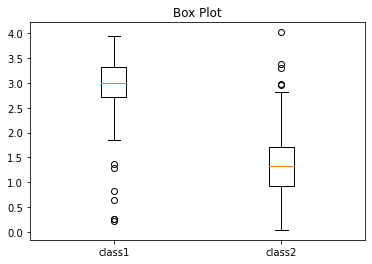

In [16]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot')
ax1.boxplot([img_mean_list_class_values[class_list[0]], img_mean_list_class_values[class_list[1]]], labels=class_list)


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
# Load class 1 and 2
def img_reader(input_path, img_list_class):
    img_value_list = []
    
    for img in img_list_class:
        current_img_path = os.path.join(input_path, img)
        current_img = cv2.imread(current_img_path)
        img_value_list.append(current_img)
    return img_value_list

img_values = {}
for cl in class_list:
    assert os.path.exists(in_path[cl]), "Please confirm the input path is correct."
    img_list = os.listdir(in_path[cl])
#     print(img_list)
    img_values[cl] = img_reader(in_path[cl], img_list)

print(img_values)

# print("The image list class 1 list is: ", img_list_class1)
# print("The image list class 2 list is: ", img_list_class2)

# Merge datasets with their labels



{'class1': [array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [3, 3, 3],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [3, 3, 3]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [6, 6, 6],
        [2, 2, 2]],

       [[1, 1, 1],
        [1, 1, 1],
        [0, 0, 0],
        ...,
        [4, 4, 4],
        [1, 1, 1],
        [5, 5, 5]]], dtype=uint8), array([[[1, 1, 1],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [0, 0, 0],
        [1, 1, 1],
 

In [19]:
print(discriptive_class1, discriptive_class2)

0      3.80
1      3.33
2      3.80
3      3.68
4      3.66
       ... 
100    3.32
101    1.87
102    0.22
103    1.86
104    2.95
Length: 105, dtype: float64 0      1.37
1      1.60
2      1.91
3      0.07
4      1.20
       ... 
129    1.24
130    0.42
131    0.95
132    2.31
133    0.80
Length: 134, dtype: float64


In [20]:
print(np.shape(img_mean_list_class_values[class_list[0]]), np.shape(img_mean_list_class_values[class_list[1]][0:105]))

(105,) (105,)


In [21]:
class1_labels = np.zeros(105)
print(class1_labels.shape)
class2_labels = np.ones(105)
print(class2_labels.shape)

(105,)
(105,)


In [48]:
img_mean_list_combined = np.append(img_mean_list_class_values[class_list[0]],
    img_mean_list_class_values[class_list[1]][0:105])

img_mean_list_combined_reshaped = img_mean_list_combined.reshape(-1, 1)
print(img_mean_list_combined_reshaped)
img_label_list_combined = np.append(class1_labels, class2_labels)
img_label_list_combined_reshaped = img_label_list_combined.reshape(-1, 1)
print(img_label_list_combined_reshaped)

[[3.8 ]
 [3.33]
 [3.8 ]
 [3.68]
 [3.66]
 [3.18]
 [3.  ]
 [3.83]
 [3.25]
 [3.32]
 [3.94]
 [2.77]
 [3.1 ]
 [3.53]
 [3.44]
 [3.02]
 [3.34]
 [3.11]
 [2.64]
 [3.38]
 [3.02]
 [2.56]
 [3.02]
 [3.02]
 [3.37]
 [3.33]
 [3.91]
 [3.14]
 [2.69]
 [3.3 ]
 [2.89]
 [0.64]
 [2.9 ]
 [2.97]
 [2.05]
 [2.8 ]
 [2.89]
 [3.32]
 [2.07]
 [3.02]
 [3.32]
 [3.24]
 [2.97]
 [3.36]
 [2.99]
 [2.44]
 [2.7 ]
 [2.99]
 [2.93]
 [3.59]
 [2.87]
 [3.44]
 [3.7 ]
 [3.02]
 [3.69]
 [3.44]
 [3.5 ]
 [3.12]
 [3.15]
 [3.45]
 [2.8 ]
 [0.26]
 [0.83]
 [2.96]
 [2.71]
 [2.78]
 [2.77]
 [2.97]
 [2.84]
 [0.26]
 [3.31]
 [2.58]
 [2.49]
 [3.79]
 [3.15]
 [2.74]
 [2.87]
 [3.28]
 [1.93]
 [1.36]
 [2.  ]
 [2.99]
 [1.29]
 [2.49]
 [2.82]
 [2.47]
 [3.36]
 [2.38]
 [2.85]
 [2.72]
 [3.83]
 [2.98]
 [3.81]
 [2.31]
 [2.46]
 [2.98]
 [3.63]
 [2.72]
 [2.25]
 [3.  ]
 [3.32]
 [1.87]
 [0.22]
 [1.86]
 [2.95]
 [1.37]
 [1.6 ]
 [1.91]
 [0.07]
 [1.2 ]
 [0.2 ]
 [1.61]
 [1.29]
 [1.56]
 [1.47]
 [0.36]
 [0.12]
 [1.52]
 [1.12]
 [0.38]
 [2.19]
 [0.98]
 [1.61]
 [0.97]
 [3.3 ]


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(img_mean_list_combined_reshaped, 
                                                    img_label_list_combined_reshaped, test_size=0.14, 
                                                    random_state=0)

In [50]:
print(x_train.shape)

(180, 1)


In [51]:
# Make an instance of the model
logisticRegr = LogisticRegression()

In [52]:
# Training
logisticRegr.fit(x_train, y_train.ravel())

LogisticRegression()

In [53]:
logisticRegr.predict(x_test[0:29].reshape(-1,1))

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

In [54]:
predictions = logisticRegr.predict(x_test.reshape(-1,1))

In [55]:
# using accuracy as a measure of performance
score = logisticRegr.score(x_test.reshape(-1,1), y_test.reshape(-1,1))
print(score)

0.9


In [56]:
# Confusion Matrix
import seaborn as sns
from sklearn import metrics

In [57]:
cm = metrics.confusion_matrix(y_test.reshape(-1,1), predictions)

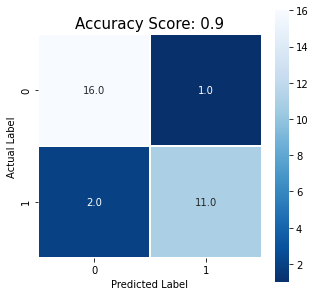

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.savefig('mean_pix_circle_feature_confusion_matrix.png')

In [59]:
# Doing Logistic Regression on the circle filtered image
def circle_pix_intensity(input_path, img_list_class):
    img_mean_list = []
    blank_img = np.zeros((row, col), dtype=np.uint8)
    circle_mask = cv2.circle(blank_img, (150,150), 25, (1,1,1), -1)
    
    for img in img_list_class:
        current_img_path = os.path.join(input_path, img)
        current_img = cv2.imread(current_img_path, 0)
        current_img_filtered = current_img*circle_mask
#         current_img_filtered_mean = np.round(np.mean(current_img_filtered), 2)
        img_mean_list.append(current_img_filtered.ravel())
    return img_mean_list

img_list_class_values = {}
for cl in class_list:
    assert os.path.exists(in_path[cl]), "Please confirm the input path is correct."
    img_list = os.listdir(in_path[cl])
#     print(img_list)
    img_list_class_values[cl] = circle_pix_intensity(in_path[cl], img_list)
print(current_img_filtered.shape)
# current_img_reshaped = current_img[300, 300, 0]
# print("reshaped image is: ", current_img)
# print(img_list_class_values)

(300, 300, 3)


In [60]:
print(np.shape(img_list_class_values[class_list[0]]), np.shape(img_list_class_values[class_list[1]][0:105]))

(105, 90000) (105, 90000)


In [61]:
img_list_combined = np.append(img_list_class_values[class_list[0]],
    img_list_class_values[class_list[1]][0:105], axis=0)
# img_list_combined_reshaped = img_label_list_combined
print(img_list_combined.shape)
# img_label_list_combined = np.append(class1_labels, class2_labels)
# img_label_list_combined_reshaped = img_label_list_combined.reshape(-1, 1)
print(img_label_list_combined_reshaped.shape)

(210, 90000)
(210, 1)


In [62]:
# plt.imshow(img_list_class_values[class_list[1]][29])

In [63]:
x_train_whole, x_test_whole, y_train_whole, y_test_whole = train_test_split(img_list_combined, 
                                                    img_label_list_combined, test_size=0.14, 
                                                    random_state=0)

In [64]:
print(y_train_whole.shape)

(180,)


In [65]:
# Make an instance of the model
logisticRegr_whole = LogisticRegression(max_iter=1000)

In [66]:
# Training
logisticRegr_whole.fit(x_train_whole, y_train_whole)


LogisticRegression(max_iter=1000)

In [69]:
# predict for one observation image
logisticRegr_whole.predict(x_test_whole[0:29])

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.])

In [70]:
# prediction for the entire dataset
predictions_whole = logisticRegr_whole.predict(x_test_whole)

In [71]:
# using accuracy as a measure of performance
score_whole = logisticRegr_whole.score(x_test_whole, y_test_whole)
print(score_whole)

0.8


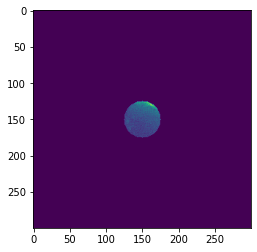

In [72]:
plt.imshow(x_test_whole[26].reshape(300,300))

In [73]:
# confusion matrix for the whole circle comparison
cm_whole = metrics.confusion_matrix(y_test_whole.reshape(-1,1), predictions_whole)

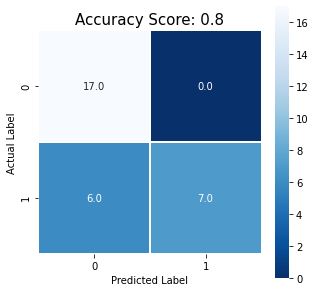

In [74]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_whole, annot=True, fmt=".1f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual Label');
plt.xlabel('Predicted Label');
all_sample_title_whole = 'Accuracy Score: {0}'.format(score_whole)
plt.title(all_sample_title_whole, size=15);
plt.savefig('mean_pix_circle_feature_confusion_matrix_whole.png')